In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_validate 
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, precision_score 
from sklearn.metrics import roc_auc_score, precision_score, roc_curve
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn import set_config
from sklearn.feature_selection import RFECV, RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [136]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Read Dress Attributes dataset

In [3]:
# 1. Load the dataset
df_dress = pd.read_excel("attribute.dataSet.xlsx" , engine='openpyxl')

### Data Exploration

In [4]:
# Visual Check
df_dress.head(10)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,NaN,NaN,NaN,print,0
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,NaN,cotton,NaN,NaN,solid,0
7,1219677488,Novelty,Average,0.0,free,Automn,o-neck,short,natural,polyster,broadcloth,lace,NaN,0
8,1113094204,Flare,Average,0.0,free,Spring,v-neck,short,empire,cotton,broadcloth,beading,solid,1
9,985292672,bohemian,Low,0.0,free,Summer,v-neck,sleevless,natural,nylon,chiffon,NaN,NaN,1


In [5]:
# Visual Check
df_dress.tail(10)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
490,641665398,Casual,Low,4.8,free,winter,bowneck,full,natural,polyster,chiffon,bow,solid,0
491,964917582,Casual,Average,5.0,L,Summer,o-neck,sleevless,natural,cotton,NaN,NaN,NaN,1
492,859922576,cute,Average,4.6,M,Spring,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,NaN,0
493,817353671,bohemian,Low,4.6,free,Summer,o-neck,sleevless,natural,cotton,chiffon,none,solid,1
494,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,natural,acrylic,chiffon,NaN,striped,0
495,713391965,Casual,Low,4.7,M,Spring,o-neck,full,natural,polyster,NaN,NaN,solid,1
496,722565148,Sexy,Low,4.3,free,Summer,o-neck,full,empire,cotton,NaN,NaN,NaN,0
497,532874347,Casual,Average,4.7,M,Summer,v-neck,full,empire,cotton,NaN,lace,solid,1
498,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,empire,silk,broadcloth,applique,print,1
499,919930954,Casual,Low,4.4,free,Summer,v-neck,short,empire,cotton,Corduroy,lace,solid,0


In [6]:
# Programitc Summary 1
df_dress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [7]:
# Programitc Summary 2
# Recommendation has descrete values of 0 or 1, Rating is continous number in a 0-5 range
df_dress[['Rating','Recommendation']].describe()

,Rating,Recommendation
count,500.000000,500.000000
mean,3.528600,0.420000
std,2.005364,0.494053
min,0.000000,0.000000
25%,3.700000,0.000000
50%,4.600000,0.000000
75%,4.800000,1.000000
max,5.000000,1.000000


### Data Tidying: Dataframe Structure

In [8]:
# Renaming Columns to a consistent naming convention:

corrections = ({"Dress_ID": "DressID", "waiseline": "Waistline", "NeckLine": "Neckline", 
                "Pattern Type": "PatternType", "SleeveLength": 'SleeveType'})

# Apply corrections to column names using dictionary comprehension
df_dress.rename(columns={old_name: new_name for old_name, new_name in corrections.items()}, inplace=True)
list(df_dress.columns)

['DressID',
 'Style',
 'Price',
 'Rating',
 'Size',
 'Season',
 'Neckline',
 'SleeveType',
 'Waistline',
 'Material',
 'FabricType',
 'Decoration',
 'PatternType',
 'Recommendation']

In [9]:
# Reordering the Columns so that target variable appears at the end of the dataframe for visual clarity
df_dress.columns.tolist()

['DressID',
 'Style',
 'Price',
 'Rating',
 'Size',
 'Season',
 'Neckline',
 'SleeveType',
 'Waistline',
 'Material',
 'FabricType',
 'Decoration',
 'PatternType',
 'Recommendation']

In [10]:
# Also, order features from broadest to narrowest category starting from Season, moving to Style, and so forth
# Also organise data according to categorical ordinal, categorical nominal and numeric variable types placed in adjacent columns
new_columns_order = ['DressID',
 'Season',
 'Style',
 'Neckline',
 'SleeveType',
 'Waistline',
 'Decoration',
 'PatternType',
 'Material',
 'FabricType',
 'Size',
 'Price',
 'Rating',
 'Recommendation']

df_dress = df_dress[new_columns_order]

In [11]:
df_dress.head(10)

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation
0,1006032852,Summer,Sexy,o-neck,sleevless,empire,ruffles,animal,NaN,chiffon,M,Low,4.6,1
1,1212192089,Summer,Casual,o-neck,Petal,natural,ruffles,animal,microfiber,NaN,L,Low,0.0,0
2,1190380701,Automn,vintage,o-neck,full,natural,NaN,print,polyster,NaN,L,High,0.0,0
3,966005983,Spring,Brief,o-neck,full,natural,embroidary,print,silk,chiffon,L,Average,4.6,1
4,876339541,Summer,cute,o-neck,butterfly,natural,bow,dot,chiffonfabric,chiffon,M,Low,4.5,0
5,1068332458,Summer,bohemian,v-neck,sleevless,empire,NaN,print,NaN,NaN,M,Low,0.0,0
6,1220707172,Summer,Casual,o-neck,full,NaN,NaN,solid,cotton,NaN,XL,Average,0.0,0
7,1219677488,Automn,Novelty,o-neck,short,natural,lace,NaN,polyster,broadcloth,free,Average,0.0,0
8,1113094204,Spring,Flare,v-neck,short,empire,beading,solid,cotton,broadcloth,free,Average,0.0,1
9,985292672,Summer,bohemian,v-neck,sleevless,natural,NaN,NaN,nylon,chiffon,free,Low,0.0,1


# Data Cleaning: Variable Values and Ranges

In [12]:
#1
# Rating
invalid_ratings = df_dress[(df_dress['Rating'] < 0) | (df_dress['Rating'] > 5)]
print(invalid_ratings)

Empty DataFrame
Columns: [DressID, Season, Style, Neckline, SleeveType, Waistline, Decoration, PatternType, Material, FabricType, Size, Price, Rating, Recommendation]
Index: []


In [13]:
df_dress['Rating'].value_counts()

0.0    120
4.7     84
4.8     57
5.0     55
4.6     54
4.5     34
4.4     27
4.9     25
4.3     20
4.0      7
4.2      6
4.1      5
3.7      2
3.6      1
3.5      1
1.0      1
3.0      1
Name: Rating, dtype: int64

In [14]:
#2
# Season
df_dress['Season'].value_counts()

Summer    159
Spring    122
Winter     99
Automn     61
winter     46
Autumn      8
spring      2
summer      1
Name: Season, dtype: int64

In [15]:
# Corrections:
season_mapping = {'Automn': 'Autumn', 'winter': 'Winter', 'spring': 'Spring', 'summer':'Summer'}

# Merge small categories into their broader categories
df_dress['Season'] = df_dress['Season'].apply(lambda x: season_mapping.get(x, x))

In [16]:
df_dress['Season'].value_counts()

Summer    160
Winter    145
Spring    124
Autumn     69
Name: Season, dtype: int64

In [17]:
#3
# Style
df_dress['Style'].value_counts()

Casual      232
Sexy         69
party        51
cute         45
vintage      25
bohemian     24
Brief        18
work         17
Novelty       8
sexy          7
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

In [18]:
# Corrections
# OL: Office Lady - Japense. fashion item is a novelty item.
style_mapping = {'party': 'Party', 'cute': 'Cute', 'vintage': 'Vintage', 'bohemian':'Bohemian', 'work':'Work', 'sexy':'Sexy','Flare':'Flare','OL':'Work','fashion':'Novelty'}

# Merge small categories into their broader categories
df_dress['Style'] = df_dress['Style'].apply(lambda x: style_mapping.get(x, x))

In [19]:
df_dress['Style'].value_counts()

Casual      232
Sexy         76
Party        51
Cute         45
Vintage      25
Bohemian     24
Brief        18
Work         18
Novelty       9
Flare         2
Name: Style, dtype: int64

In [20]:
#4
# Price
df_dress['Price'].value_counts()

Average      252
Low          129
low           45
Medium        30
very-high     21
high          15
High           6
Name: Price, dtype: int64

In [21]:
# Corrections
price_mapping = {"low": "Low", "very-high":"Very-high", "high":"High", "Average":"Medium"}

# Merge small categories into their broader categories
df_dress['Price'] = df_dress['Price'].apply(lambda x: price_mapping.get(x, x))


In [22]:
# Check the new value counts
df_dress['Price'].value_counts()

Medium       282
Low          174
High          21
Very-high     21
Name: Price, dtype: int64

In [23]:
#5
# Material
df_dress['Material'].value_counts()

cotton           152
polyster          99
silk              26
chiffonfabric     25
mix               12
nylon             10
rayon             10
milksilk           5
spandex            5
cashmere           4
acrylic            3
microfiber         3
lycra              3
linen              3
other              2
viscos             2
shiffon            2
lace               1
modal              1
knitting           1
sill               1
wool               1
model              1
Name: Material, dtype: int64

In [24]:
# Corrections
material_mapping = {"model":"modal","sill":"silk","viscos":"viscose", "shiffon":"chiffon", "chiffonfabric":"chiffon",
                                                 "polyster":"polyester" }

# Merge small categories into their broader categories
df_dress['Material'] = df_dress['Material'].apply(lambda x: material_mapping.get(x, x))


# Make Names capitalised
df_dress['Material'] = df_dress['Material'].str.capitalize()


In [25]:
df_dress['Material'].value_counts()

Cotton        152
Polyester      99
Silk           27
Chiffon        27
Mix            12
Nylon          10
Rayon          10
Milksilk        5
Spandex         5
Cashmere        4
Microfiber      3
Acrylic         3
Lycra           3
Linen           3
Modal           2
Other           2
Viscose         2
Lace            1
Knitting        1
Wool            1
Name: Material, dtype: int64

In [26]:
#6
# FabricType
df_dress['FabricType'].value_counts()

chiffon       135
broadcloth     31
worsted        19
jersey         12
shiffon         9
sattin          6
batik           2
wollen          2
Corduroy        2
poplin          2
dobby           2
tulle           2
organza         1
knitted         1
lace            1
knitting        1
flannel         1
woolen          1
flannael        1
satin           1
other           1
terry           1
Name: FabricType, dtype: int64

In [27]:
# Corrections
fabrictype_mapping = {"sattin":"satin", "shiffon":"chiffon", "knitting":"knitted", "wollen":"woollen", "woolen":"woollen", "flannael":"flannel"}

# Merge small categories into their broader categories
df_dress['FabricType'] = df_dress['FabricType'].apply(lambda x: fabrictype_mapping.get(x, x))

# Make Names capitalised
df_dress['FabricType'] = df_dress['FabricType'].str.capitalize()


In [28]:
# Check the new value counts
df_dress['FabricType'].value_counts()

Chiffon       144
Broadcloth     31
Worsted        19
Jersey         12
Satin           7
Woollen         3
Flannel         2
Batik           2
Poplin          2
Dobby           2
Knitted         2
Tulle           2
Corduroy        2
Other           1
Organza         1
Lace            1
Terry           1
Name: FabricType, dtype: int64

In [29]:
#7
# SleeveType
df_dress['SleeveType'].value_counts()

sleevless         223
full               97
short              96
halfsleeve         35
threequarter       17
thressqatar        10
sleeveless          5
sleeevless          3
capsleeves          3
cap-sleeves         2
urndowncollor       1
half                1
turndowncollor      1
threequater         1
Petal               1
butterfly           1
sleveless           1
Name: SleeveType, dtype: int64

In [30]:
# Corrections
sleevetype_mapping = ({"sleevless":"sleeveless", "sleeevless":"sleeveless", "sleveless":"sleeveless",
                         "thressqatar":"three-quarter", "threequarter":"three-quarter", "threequater":"three-quarter",          
                         "half": "half-sleeve", "halfsleeve":"half-sleeve", 
                         "cap-sleeves":"cap-sleeve", "capsleeve":"cap-sleeve", "capsleeves":"cap-sleeve",
                         "urndowncollor":"turndowncollor"})

# Merge small categories into their broader categories
df_dress['SleeveType'] = df_dress['SleeveType'].apply(lambda x: sleevetype_mapping.get(x, x))

# Make Names capitalised
df_dress['SleeveType'] = df_dress['SleeveType'].str.capitalize()


In [31]:

# Check the new value counts
df_dress['SleeveType'].value_counts()


Sleeveless        232
Full               97
Short              96
Half-sleeve        36
Three-quarter      28
Cap-sleeve          5
Turndowncollor      2
Petal               1
Butterfly           1
Name: SleeveType, dtype: int64

In [32]:
#8
# Decoration
df_dress['Decoration'].value_counts().sort_index(ascending=True)#.sort_values(ascending=True)#.reset_index()

Tiered         1
applique      21
beading       22
bow           15
button         6
cascading      1
crystal        3
draped         2
embroidary     5
feathers       2
flowers        4
hollowout     21
lace          70
none           2
pearls         1
plain          2
pleat          1
pockets        5
rivet          3
ruched         3
ruffles       17
sashes        42
sequined      14
tassel         1
Name: Decoration, dtype: int64

In [33]:
# Corrections
decoration_mapping = ({"embroidary":"embroidery"})

# Merge small categories into their broader categories
df_dress['Decoration'] = df_dress['Decoration'].apply(lambda x: decoration_mapping.get(x, x))

# Make Names capitalised
df_dress['Decoration'] = df_dress['Decoration'].str.capitalize()

In [34]:
# Check the new value counts
df_dress['Decoration'].value_counts()

Lace          70
Sashes        42
Beading       22
Hollowout     21
Applique      21
Ruffles       17
Bow           15
Sequined      14
Button         6
Pockets        5
Embroidery     5
Flowers        4
Ruched         3
Crystal        3
Rivet          3
Feathers       2
Draped         2
Plain          2
None           2
Pearls         1
Pleat          1
Tiered         1
Tassel         1
Cascading      1
Name: Decoration, dtype: int64

In [35]:
#9
# PatternType
df_dress['PatternType'].value_counts().sort_index(ascending=True)

animal        21
character      1
dot           14
floral         2
geometric      5
leapord        1
leopard        3
none           1
patchwork     48
plaid          3
print         71
solid        203
splice         1
striped       17
Name: PatternType, dtype: int64

In [36]:
# Corrections
patterntype_mapping = ({'leapord':'leopard'})

# Merge small categories into their broader categories
df_dress['PatternType'] = df_dress['PatternType'].apply(lambda x: patterntype_mapping.get(x, x))

# Make Names capitalised
df_dress['PatternType'] = df_dress['PatternType'].str.capitalize()


In [37]:
# Check the new value counts
df_dress['PatternType'].value_counts()

Solid        203
Print         71
Patchwork     48
Animal        21
Striped       17
Dot           14
Geometric      5
Leopard        4
Plaid          3
Floral         2
Character      1
Splice         1
None           1
Name: PatternType, dtype: int64

In [38]:
#10
# Neckline
df_dress['Neckline'].value_counts().sort_index(ascending=True)

Scoop                2
Sweetheart          14
backless             1
boat-neck           19
bowneck             10
halter               1
mandarin-collor      1
o-neck             271
open                 3
peterpan-collor      6
ruffled              1
slash-neck          25
sqare-collor         5
sweetheart           1
turndowncollor      13
v-neck             124
Name: Neckline, dtype: int64

In [39]:
# Corrections
neckline_mapping = ({"sweetheart": "Sweetheart","sqare-collor":"square-collor", "turndowncollor":"turndown-collor"})

# Merge small categories into their broader categories
df_dress['Neckline'] = df_dress['Neckline'].apply(lambda x: neckline_mapping.get(x, x))

# Make Names capitalised
df_dress['Neckline'] = df_dress['Neckline'].str.capitalize()


In [40]:
# Check the new value counts
df_dress['Neckline'].value_counts()

O-neck             271
V-neck             124
Slash-neck          25
Boat-neck           19
Sweetheart          15
Turndown-collor     13
Bowneck             10
Peterpan-collor      6
Square-collor        5
Open                 3
Scoop                2
Ruffled              1
Mandarin-collor      1
Halter               1
Backless             1
Name: Neckline, dtype: int64

In [41]:
#11
# Size
df_dress['Size'].value_counts()

M        177
free     173
L         96
S         37
XL        15
small      1
s          1
Name: Size, dtype: int64

In [42]:
# Corrections
size_mapping =({"M":"Medium","L":"Large","XL":"Extra-Large",
                 "free":"Free","S":"Small","s":"Small","small":"Small"})

# Merge small categories into their broader categories
df_dress['Size'] = df_dress['Size'].apply(lambda x: size_mapping.get(x, x))


In [43]:
# Check the new value counts
df_dress['Size'].value_counts()

Medium         177
Free           173
Large           96
Small           39
Extra-Large     15
Name: Size, dtype: int64

In [ ]:
#12
# Rat
df_dress['Waistline'].value_counts()

In [45]:
# Make Names capitalised
df_dress['Waistline'] = df_dress['Waistline'].str.capitalize()

In [46]:
# Check the new value counts
df_dress['Waistline'].value_counts()

Natural     304
Empire      104
Dropped       4
Princess      1
Name: Waistline, dtype: int64

In [128]:
#13
# Rating
df_dress['Rating'].value_counts()

0.0    119
4.7     76
4.8     55
5.0     53
4.6     53
4.5     31
4.4     25
4.9     22
4.3     16
4.0      7
4.2      6
4.1      5
3.7      2
3.6      1
1.0      1
3.5      1
3.0      1
Name: Rating, dtype: int64

In [127]:
#14
# Recommendation
df_dress['Recommendation'].value_counts(0)

0    268
1    206
Name: Recommendation, dtype: int64

In [47]:
# Final Visual Check of the dataframe
# Data looks more consistent and easier to work with
df_dress.head(10)

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation
0,1006032852,Summer,Sexy,O-neck,Sleeveless,Empire,Ruffles,Animal,NaN,Chiffon,Medium,Low,4.6,1
1,1212192089,Summer,Casual,O-neck,Petal,Natural,Ruffles,Animal,Microfiber,NaN,Large,Low,0.0,0
2,1190380701,Autumn,Vintage,O-neck,Full,Natural,NaN,Print,Polyester,NaN,Large,High,0.0,0
3,966005983,Spring,Brief,O-neck,Full,Natural,Embroidery,Print,Silk,Chiffon,Large,Medium,4.6,1
4,876339541,Summer,Cute,O-neck,Butterfly,Natural,Bow,Dot,Chiffon,Chiffon,Medium,Low,4.5,0
5,1068332458,Summer,Bohemian,V-neck,Sleeveless,Empire,NaN,Print,NaN,NaN,Medium,Low,0.0,0
6,1220707172,Summer,Casual,O-neck,Full,NaN,NaN,Solid,Cotton,NaN,Extra-Large,Medium,0.0,0
7,1219677488,Autumn,Novelty,O-neck,Short,Natural,Lace,NaN,Polyester,Broadcloth,Free,Medium,0.0,0
8,1113094204,Spring,Flare,V-neck,Short,Empire,Beading,Solid,Cotton,Broadcloth,Free,Medium,0.0,1
9,985292672,Summer,Bohemian,V-neck,Sleeveless,Natural,NaN,NaN,Nylon,Chiffon,Free,Low,0.0,1


### Data Cleaning: Remove Duplicate Values

In [48]:
## Check if duplicates exist:

duplicates = df_dress.duplicated().sum()
duplicates


1

In [49]:
# Reveal duplicate rows
df_dress[df_dress.duplicated(keep=False)]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation
250,699738864,Summer,Casual,O-neck,Full,Natural,NaN,Patchwork,Cotton,NaN,Small,Low,4.7,0
336,699738864,Summer,Casual,O-neck,Full,Natural,NaN,Patchwork,Cotton,NaN,Small,Low,4.7,0


In [50]:
# drop duplicate row:
df_dress.drop_duplicates(keep='first', inplace=True) #subset=['A', 'C'], 

In [51]:
# Duplicates disappeared now
duplicates = df_dress.duplicated().sum()
duplicates

0

In [52]:
# Check duplicate on DressID, which should be unique
duplicates = df_dress['DressID'].duplicated().sum()
duplicates

24

In [53]:
# Reveal duplicate DressID rows
df_dress[df_dress['DressID'].duplicated(keep=False)].sort_values(['DressID'])

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation
454,549159213,Summer,Casual,O-neck,Cap-sleeve,Natural,NaN,Solid,Cotton,NaN,Free,Medium,4.4,0
180,549159213,Summer,Casual,O-neck,Short,Natural,NaN,Solid,Cotton,NaN,Free,Medium,4.5,1
184,560474456,Winter,Sexy,V-neck,Sleeveless,Natural,Lace,Solid,Silk,Worsted,Free,Low,4.3,1
429,560474456,Autumn,Sexy,V-neck,Sleeveless,Natural,Lace,Solid,Cotton,Worsted,Free,Low,4.4,0
361,709353440,Summer,Cute,O-neck,Sleeveless,Natural,Sashes,Splice,Chiffon,NaN,Medium,Medium,4.7,0
133,709353440,Winter,Cute,O-neck,Sleeveless,Natural,Lace,Solid,Chiffon,NaN,Large,Medium,4.7,0
178,722565148,Autumn,Sexy,O-neck,Full,Empire,NaN,Leopard,Cotton,NaN,Free,Low,4.4,0
496,722565148,Summer,Sexy,O-neck,Full,Empire,NaN,NaN,Cotton,NaN,Free,Low,4.3,0
380,727676110,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Polyester,NaN,Free,Low,4.6,0
195,727676110,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Polyester,NaN,Free,Low,4.6,1


In [54]:
# Let's capture the max of Recommendations for duplicate Dress Ids, 
# We consider that if one of the duplicate Dress Ids received a Recommendation that it applies to both rows.
# In the real world this issues would be ivestigated and the assumption would be validated before this transformation is applied to the data set
df_dress['Recommendation'] = df_dress.groupby(['DressID'])['Recommendation'].transform(max)

In [55]:
# let's drop rows where DressID is duplicated, DressId should be unique per row.
# https://stackoverflow.com/questions/43769693/drop-duplicates-in-a-dataframe-keeping-the-row-with-the-least-nulls
df_dress = (df_dress.assign(counts=df_dress.count(axis=1))
   .sort_values(['DressID', 'counts']) # ascending=[False]
   .drop_duplicates('DressID', keep='last') # Could also keep='first', combined with ascending=[False]
   .drop('counts', axis=1))

In [56]:
# Duplicate DressID rows are removed
duplicates = df_dress['DressID'].duplicated().sum()
duplicates

0

### Data Cleaning: Impute or Remove Missing Values

In [57]:
# There are no NaN DressIDs
df_dress['DressID'].isna().sum()

0

In [58]:
# Check all NaN values are not strings
print("""
NaN: %(n1)s\n
NAN: %(n2)s\n
nan: %(n3)s\n
na: %(n4)s\n
None: %(n5)s\n
none: %(n6)s\n
 : %(n7)s\n
: %(n8)s
""" % {'n1':(df_dress.values == 'NaN').sum(), 
       'n2':(df_dress.values == 'NAN').sum(),
       'n3':(df_dress.values == 'nan').sum(),
       'n4':(df_dress.values == 'na').sum(),
       'n5':(df_dress.values == 'None').sum(),
       'n6':(df_dress.values == 'none').sum(),
       'n7':(df_dress.values == ' ').sum(),
       'n8':(df_dress.values == '').sum()})


NaN: 0

NAN: 0

nan: 0

na: 0

None: 3

none: 0

 : 0

: 0



In [59]:
# Replace None string with native NaN
df_dress.replace('None', np.nan, inplace=True)

In [60]:
# check replacement took place
(df_dress.values == 'None').sum()

0

In [61]:
# Inspect columns with high null values
# FabricType, Decoration, Material, PatternType, and Waistline are ones with highest null percentages
# Next steps is attempting to reduce NaNs using different techniques
df_dress.isnull().mean()*100

DressID            0.000000
Season             0.421053
Style              0.000000
Neckline           0.631579
SleeveType         0.421053
Waistline         17.684211
Decoration        46.736842
PatternType       21.684211
Material          24.842105
FabricType        53.263158
Size               0.000000
Price              0.421053
Rating             0.000000
Recommendation     0.000000
dtype: float64

In [62]:
df_dress.columns.tolist()

['DressID',
 'Season',
 'Style',
 'Neckline',
 'SleeveType',
 'Waistline',
 'Decoration',
 'PatternType',
 'Material',
 'FabricType',
 'Size',
 'Price',
 'Rating',
 'Recommendation']

In [63]:
# let's count number of rows with duplicate 'Season','Style','Neckline','SleeveType','Waistline', to check if there are multiple rows of the same dress corresponding to sizes!
# The number does not suggest multiple rows per size for each dress.
df_dress[df_dress[['Season','Style','Neckline','SleeveType','Waistline']].duplicated(keep=False)]['DressID'].count()#.sort_values(['Size'])

241

In [64]:
# visual inspection of the previous selection, does not reveal the presense of multi lines per size variation for a dress. 
# therefore we are unable to use different size rows to directly fill in NaNs in the data!
df_dress[df_dress[['Season','Style','Neckline','SleeveType','Waistline']].duplicated(keep=False)].sort_values(['Season','Style','Neckline','SleeveType','Waistline','Size'])[0:50] #slice different portions for inspection [50:100]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation
439,549401113,Autumn,Casual,O-neck,Full,Natural,Lace,Solid,Rayon,NaN,Free,Low,4.6,1
107,680070369,Autumn,Casual,O-neck,Full,Natural,NaN,Solid,Cotton,NaN,Free,Low,4.6,1
86,1065316076,Autumn,Casual,O-neck,Full,Natural,Beading,Solid,NaN,NaN,Small,Low,0.0,1
117,1018130478,Autumn,Casual,O-neck,Full,NaN,Lace,Print,Cotton,Chiffon,Large,Low,4.7,0
138,520233308,Autumn,Casual,O-neck,Full,NaN,NaN,Solid,Cotton,NaN,Medium,Low,4.7,0
463,751776863,Autumn,Casual,O-neck,Half-sleeve,Natural,Hollowout,Solid,Cotton,Chiffon,Free,Medium,4.5,1
383,839305476,Autumn,Casual,O-neck,Half-sleeve,Natural,NaN,Leopard,Chiffon,Chiffon,Free,Low,4.6,1
235,890279029,Autumn,Casual,O-neck,Short,Empire,Applique,Dot,Polyester,NaN,Medium,Medium,4.6,0
112,1039982741,Autumn,Casual,O-neck,Short,Empire,Applique,Print,Polyester,NaN,Medium,Medium,0.0,0
202,981437831,Autumn,Casual,O-neck,Short,Natural,NaN,NaN,Chiffon,Chiffon,Extra-Large,Medium,5.0,0


In [65]:
# Perhaps we can fill Material column with a probablistic value based on 'PatternType','Material', 'FabricType' combinations present in the data.
# The idea is that when Material is NaN, Its values are likely to match rows where PatternType and FabricType hold same values. 
# Where multiple values exist, select based on the probablistic distribution of occurance in the dataset for those combinations.

# let's define a multipurpose function to produce those probablistic distributions
def df_freq_calc(columns, df_sub):
    df_freq = df_sub[columns].value_counts(normalize=True).reset_index(name='p').sort_values(['p'],ascending=False).copy(deep=True).reset_index().drop('index', axis=1)
    df_freq['p']=np.array(df_freq['p'],dtype='float64')
    return df_freq



In [66]:
count = 0
count_missed = 0
columns = ['PatternType','Material', 'FabricType']
p = []
choice = []
for i,r in df_dress[df_dress['Material'].isnull() & df_dress['PatternType'].notna() & df_dress['FabricType'].notna()].iterrows():
    #print(r['Material'] == 'NaN')
    try:
        df_freq = df_freq_calc(columns, df_dress[(df_dress['PatternType'] == r['PatternType']) & (df_dress['FabricType'] == r['FabricType'])])
        #r['Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        df_dress.loc[i,'Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        p.append(df_freq.p)
        choice.append(df_dress.loc[i,'Material'])
    except:
        count_missed += 1
        print('no combination found!')
        #print(len(df_freq))
        #print(r)
    #print(r)
    #print('\n')
    #print(df_freq)
    #print('\n*****\n')
    count+=1
    #if count > 1: break
print(count)
print(count_missed)
print(choice)
pd.DataFrame(p)

no combination found!
29
1
['Silk', 'Polyester', 'Cotton', 'Cotton', 'Chiffon', 'Rayon', 'Linen', 'Chiffon', 'Polyester', 'Cotton', 'Rayon', 'Polyester', 'Silk', 'Polyester', 'Cotton', 'Cotton', 'Mix', 'Polyester', 'Chiffon', 'Polyester', 'Polyester', 'Silk', 'Chiffon', 'Silk', 'Rayon', 'Polyester', 'Cotton', 'Cotton']


,0,1,2,3,4,5
p,0.312500,0.250000,0.187500,0.187500,0.062500,NaN
p,0.324324,0.243243,0.189189,0.135135,0.081081,0.027027
p,0.714286,0.142857,0.142857,NaN,NaN,NaN
p,0.800000,0.200000,NaN,NaN,NaN,NaN
p,0.352941,0.235294,0.176471,0.176471,0.058824,NaN
p,0.342105,0.236842,0.184211,0.131579,0.078947,0.026316
p,0.750000,0.250000,NaN,NaN,NaN,NaN
p,0.333333,0.230769,0.179487,0.128205,0.102564,0.025641
p,0.325000,0.225000,0.200000,0.125000,0.100000,0.025000
p,0.333333,0.277778,0.166667,0.166667,0.055556,NaN


In [67]:
# Recheck Material NaN percent in the dataframe
# It has now dropped to 18.95% from 24.84% 
df_dress.isnull().mean()*100

DressID            0.000000
Season             0.421053
Style              0.000000
Neckline           0.631579
SleeveType         0.421053
Waistline         17.684211
Decoration        46.736842
PatternType       21.684211
Material          18.947368
FabricType        53.263158
Size               0.000000
Price              0.421053
Rating             0.000000
Recommendation     0.000000
dtype: float64

In [68]:
# let's check if there are still many Material rows with NaN where FabricType is known
# We can repeat the previous step and estimated (with less certainty) for those remaining Material NaN based on Material and FabricType columns probabilistic combination only 
# i.e. using two variables instead of three to estimate the value!
df_dress[df_dress['Material'].isna() & (df_dress['FabricType'].notna())]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation
293,444282011,Spring,Party,V-neck,Sleeveless,Empire,Beading,NaN,NaN,Satin,Medium,Very-high,4.9,1
261,609889168,Winter,Party,Sweetheart,Sleeveless,Natural,Flowers,NaN,NaN,Chiffon,Medium,High,4.7,0
265,619817668,Winter,Party,Sweetheart,Sleeveless,Natural,NaN,NaN,NaN,Chiffon,Medium,High,4.6,0
450,720087997,Spring,Casual,O-neck,Full,NaN,Sashes,NaN,NaN,Chiffon,Free,Low,4.3,1
132,732736124,Spring,Work,V-neck,Full,NaN,NaN,NaN,NaN,Chiffon,Medium,Medium,4.6,0
290,736076633,Spring,Party,Slash-neck,Sleeveless,NaN,Flowers,NaN,NaN,Chiffon,Large,Very-high,4.9,1
284,736813752,Summer,Party,Slash-neck,Sleeveless,Natural,NaN,NaN,NaN,Chiffon,Medium,High,4.6,1
434,737461130,Summer,Casual,V-neck,Full,Natural,NaN,NaN,NaN,Chiffon,Medium,Medium,4.8,0
283,825341937,Summer,Party,Sweetheart,Sleeveless,Princess,NaN,NaN,NaN,Satin,Medium,High,4.8,1
201,861698160,Autumn,Casual,V-neck,Full,NaN,Sashes,NaN,NaN,Chiffon,Medium,Medium,4.1,1


In [69]:
count = 0
count_missed = 0
columns = ['Material', 'FabricType']
p = []
choice = []

for i,r in df_dress[df_dress['Material'].isnull() & df_dress['FabricType'].notna()].iterrows():
    #print(r['Material'] == 'NaN')
    try:
        df_freq = df_freq_calc(columns, df_dress[(df_dress['FabricType'] == r['FabricType'])])
        #r['Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        df_dress.loc[i,'Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        p.append(df_freq.p)
        choice.append(df_dress.loc[i,'Material'])
    except:
        count_missed += 1
        print('no combination found!')
        #print(len(df_freq))
        #print(r)
    #print(r)
    #print('\n')
    #print(df_freq)
    #print('\n*****\n')
    count+=1
    #if count > 1: break
print(count)
print(count_missed)
print(choice)
pd.DataFrame(p)

no combination found!
18
1
['Lycra', 'Cotton', 'Polyester', 'Cotton', 'Chiffon', 'Viscose', 'Silk', 'Mix', 'Polyester', 'Chiffon', 'Polyester', 'Polyester', 'Silk', 'Polyester', 'Cotton', 'Chiffon', 'Chiffon']


,0,1,2,3,4,5,6,7,8,9,10,11
p,0.600000,0.200000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.295082,0.213115,0.188525,0.147541,0.065574,0.024590,0.016393,0.016393,0.008197,0.008197,0.008197,0.008197
p,0.292683,0.211382,0.195122,0.146341,0.065041,0.024390,0.016260,0.016260,0.008130,0.008130,0.008130,0.008130
p,0.298387,0.209677,0.193548,0.145161,0.064516,0.024194,0.016129,0.016129,0.008065,0.008065,0.008065,0.008065
p,0.296000,0.208000,0.200000,0.144000,0.064000,0.024000,0.016000,0.016000,0.008000,0.008000,0.008000,0.008000
p,0.293651,0.214286,0.198413,0.142857,0.063492,0.023810,0.015873,0.015873,0.007937,0.007937,0.007937,0.007937
p,0.291339,0.212598,0.196850,0.141732,0.062992,0.023622,0.015748,0.015748,0.015748,0.007874,0.007874,0.007874
p,0.289062,0.210938,0.195312,0.148438,0.062500,0.023438,0.015625,0.015625,0.015625,0.007812,0.007812,0.007812
p,0.500000,0.333333,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.286822,0.209302,0.193798,0.147287,0.062016,0.031008,0.015504,0.015504,0.015504,0.007752,0.007752,0.007752


In [70]:
# One element was not matched to any plausable value.
df_dress[df_dress['Material'].isna() & (df_dress['FabricType'].notna())]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation
462,1097157656,Spring,Casual,Boat-neck,Three-quarter,Natural,Lace,Animal,NaN,Dobby,Large,Medium,4.5,1


In [71]:
# Recheck Material NaN percent in the dataframe
# It has now dropped to 15.36% from 18.95% 
df_dress.isnull().mean()*100

DressID            0.000000
Season             0.421053
Style              0.000000
Neckline           0.631579
SleeveType         0.421053
Waistline         17.684211
Decoration        46.736842
PatternType       21.684211
Material          15.368421
FabricType        53.263158
Size               0.000000
Price              0.421053
Rating             0.000000
Recommendation     0.000000
dtype: float64

In [72]:
# Where rows are very similar we can estimate the values of NaN by using forward fill and backward fill from existing similar rows 
# 8 NaNs found
df_dress['count'] = df_dress.groupby(['Season','Style', 'Neckline', 'SleeveType', 'Waistline','Decoration','Size','Price'])['DressID'].transform('count')
df_dress[df_dress['count']>1].sort_values(by=['Season','Style', 'Neckline', 'SleeveType', 'Waistline','Decoration','Size', 'Price'])
n = df_dress[df_dress['count']>1].isna().sum().sum()
print('count NaN %s' % (n))


,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
235,890279029,Autumn,Casual,O-neck,Short,Empire,Applique,Dot,Polyester,NaN,Medium,Medium,4.6,0,2.0
112,1039982741,Autumn,Casual,O-neck,Short,Empire,Applique,Print,Polyester,NaN,Medium,Medium,0.0,0,2.0
474,850490510,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,4.6,0,2.0
390,1108356000,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,NaN,NaN,NaN,Medium,Medium,0.0,0,2.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,2.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,2.0
170,722020708,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Mix,Worsted,Free,Low,4.5,0,3.0
380,727676110,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Polyester,NaN,Free,Low,4.6,1,3.0
394,900108476,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Wool,NaN,Free,Low,5.0,0,3.0


count NaN 8


In [73]:
# Carry out the ffill()on those NaNs

cond=df_dress['count']>1
df_temp = df_dress.loc[cond].groupby(['Season','Style', 'Neckline', 'SleeveType', 'Waistline','Decoration','Size','Price']).apply(lambda x: x.ffill().bfill())
df_temp

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
170,722020708,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Mix,Worsted,Free,Low,4.5,0,3.0
380,727676110,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Polyester,Worsted,Free,Low,4.6,1,3.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,2.0
474,850490510,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,4.6,0,2.0
235,890279029,Autumn,Casual,O-neck,Short,Empire,Applique,Dot,Polyester,NaN,Medium,Medium,4.6,0,2.0
394,900108476,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Wool,Worsted,Free,Low,5.0,0,3.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,2.0
112,1039982741,Autumn,Casual,O-neck,Short,Empire,Applique,Print,Polyester,NaN,Medium,Medium,0.0,0,2.0
390,1108356000,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,0.0,0,2.0


In [74]:
common_indices = df_dress.index.intersection(df_temp.index)
common_indices

Int64Index([170, 380, 63, 474, 235, 394, 219, 112, 390], dtype='int64')

In [75]:
df_temp.index

Int64Index([170, 380, 63, 474, 235, 394, 219, 112, 390], dtype='int64')

In [76]:
df_dress.loc[common_indices,['PatternType', 'Material','FabricType']] = df_temp.loc[common_indices,['PatternType', 'Material','FabricType']]
df_dress[cond]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
170,722020708,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Mix,Worsted,Free,Low,4.5,0,3.0
380,727676110,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Polyester,Worsted,Free,Low,4.6,1,3.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,2.0
474,850490510,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,4.6,0,2.0
235,890279029,Autumn,Casual,O-neck,Short,Empire,Applique,Dot,Polyester,NaN,Medium,Medium,4.6,0,2.0
394,900108476,Winter,Casual,O-neck,Full,Natural,Applique,Solid,Wool,Worsted,Free,Low,5.0,0,3.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,2.0
112,1039982741,Autumn,Casual,O-neck,Short,Empire,Applique,Print,Polyester,NaN,Medium,Medium,0.0,0,2.0
390,1108356000,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,0.0,0,2.0


In [77]:
# this is reduced to 4 NaNs
n = df_dress[df_dress['count']>1].isna().sum().sum()
print('count NaN %s' % (n))

count NaN 4


In [78]:
# inspect combinations of 'Decoration' and 'PatternType' in the data
df_dress[['Decoration','PatternType']].value_counts()

Decoration  PatternType
Lace        Solid          31
Sashes      Solid          24
Hollowout   Solid          14
Beading     Solid          11
Sequined    Solid          11
Lace        Patchwork       9
Sashes      Print           8
Applique    Solid           7
Ruffles     Solid           7
Applique    Print           6
Pockets     Solid           5
Bow         Solid           5
Button      Solid           4
Lace        Print           4
Bow         Dot             4
Ruffles     Animal          4
Lace        Geometric       3
Embroidery  Print           3
Bow         Patchwork       3
Applique    Dot             2
Ruched      Solid           2
Plain       Solid           2
Rivet       Solid           2
Applique    Patchwork       2
Hollowout   Patchwork       2
Lace        Animal          2
Hollowout   Print           2
Ruffles     Print           2
Sashes      Striped         2
Sequined    Patchwork       2
Ruffles     Dot             2
            Striped         1
Sashes      Geom

In [79]:
# remove previous temporary count column now
df_dress.drop(['count'], axis=1, inplace=True)

In [80]:
# Where rows are very similar we can estimate the values of NaN by using forward fill and backward fill from existing similar rows 
# let's do it on another column combination
# 9 NaNs
df_dress['count'] = df_dress.groupby(['Season','Style', 'Neckline', 'SleeveType', 'Waistline','Decoration','Material'])['DressID'].transform('count')
df_dress[df_dress['count']>1].sort_values(by=['Season','Style', 'Neckline', 'SleeveType', 'Waistline','Decoration','Material'])
n = df_dress[df_dress['count']>1].isna().sum().sum()
print('count NaN %s' % (n))


,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
235,890279029,Autumn,Casual,O-neck,Short,Empire,Applique,Dot,Polyester,NaN,Medium,Medium,4.6,0,2.0
112,1039982741,Autumn,Casual,O-neck,Short,Empire,Applique,Print,Polyester,NaN,Medium,Medium,0.0,0,2.0
474,850490510,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,4.6,0,2.0
390,1108356000,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,0.0,0,2.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,3.0
337,905732124,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Print,Polyester,NaN,Free,Low,4.4,0,3.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,3.0
461,660179663,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,NaN,Medium,Medium,4.5,0,2.0
217,756620535,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Free,Low,4.6,1,2.0
245,694493217,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Striped,Cotton,NaN,Medium,Low,4.6,0,2.0


count NaN 9


In [81]:
# Carry out the ffill() and bfill()

cond=df_dress['count']>1
df_temp = df_dress.loc[cond].groupby(['Season','Style', 'Neckline', 'SleeveType', 'Waistline','Decoration','Material']).apply(lambda x: x.ffill().bfill()) #.reset_index(drop=True)
df_temp.sort_values(by=['Season','Style', 'Neckline', 'SleeveType', 'Waistline','Decoration','Material'])

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
235,890279029,Autumn,Casual,O-neck,Short,Empire,Applique,Dot,Polyester,NaN,Medium,Medium,4.6,0,2.0
112,1039982741,Autumn,Casual,O-neck,Short,Empire,Applique,Print,Polyester,NaN,Medium,Medium,0.0,0,2.0
474,850490510,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,4.6,0,2.0
390,1108356000,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,0.0,0,2.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,3.0
337,905732124,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Print,Polyester,Chiffon,Free,Low,4.4,0,3.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,3.0
461,660179663,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Medium,Medium,4.5,0,2.0
217,756620535,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Free,Low,4.6,1,2.0
245,694493217,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Striped,Cotton,Chiffon,Medium,Low,4.6,0,2.0


In [82]:
common_indices = df_dress.index.intersection(df_temp.index)
common_indices

Int64Index([461, 245, 63, 217, 23, 474, 235, 337, 219, 203, 370, 112, 390], dtype='int64')

In [83]:
df_temp.index

Int64Index([461, 245, 63, 217, 23, 474, 235, 337, 219, 203, 370, 112, 390], dtype='int64')

In [84]:
df_dress.loc[common_indices,['PatternType', 'FabricType']] = df_temp.loc[common_indices,['PatternType', 'FabricType']]
df_dress[cond]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
461,660179663,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Medium,Medium,4.5,0,2.0
245,694493217,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Striped,Cotton,Chiffon,Medium,Low,4.6,0,2.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,3.0
217,756620535,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Free,Low,4.6,1,2.0
23,840516484,Summer,Sexy,V-neck,Sleeveless,Empire,Sequined,Solid,Cotton,NaN,Small,Medium,4.7,1,2.0
474,850490510,Spring,Casual,O-neck,Half-sleeve,Natural,Lace,Solid,Polyester,NaN,Medium,Medium,4.6,0,2.0
235,890279029,Autumn,Casual,O-neck,Short,Empire,Applique,Dot,Polyester,NaN,Medium,Medium,4.6,0,2.0
337,905732124,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Print,Polyester,Chiffon,Free,Low,4.4,0,3.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,3.0
203,1036456647,Summer,Sexy,V-neck,Sleeveless,Empire,Sequined,Solid,Cotton,NaN,Medium,Medium,5.0,1,2.0


In [85]:
# this is reduced to 6 NaNs
n = df_dress[df_dress['count']>1].isna().sum().sum()
print('count NaN %s' % (n))

count NaN 6


In [86]:
# Remove the temporary count column
df_dress.drop(['count'], axis=1, inplace=True)

In [87]:
# Where rows are very similar we can estimate the values of NaN by using forward fill and backward fill from the existing similar rows 
# targetting different combination of columns
# 5 NaNs found
df_dress['count'] = df_dress.groupby(['Season','Style', 'Neckline', 'SleeveType', 'Waistline','PatternType','Material','FabricType'])['DressID'].transform('count')
df_dress[df_dress['count']>1].sort_values(by=['Season','Style', 'Neckline', 'SleeveType', 'Waistline','PatternType','Material','FabricType'])
n = df_dress[df_dress['count']>1].isna().sum().sum()
print('count NaN %s' % (n))



,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
328,945651303,Spring,Casual,O-neck,Sleeveless,Natural,NaN,Solid,Chiffon,Chiffon,Medium,Low,5.0,1,2.0
481,1061890181,Spring,Casual,O-neck,Sleeveless,Natural,Sequined,Solid,Chiffon,Chiffon,Large,Medium,0.0,0,2.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,3.0
78,939770391,Spring,Casual,O-neck,Sleeveless,Natural,NaN,Solid,Polyester,Chiffon,Free,Medium,0.0,0,3.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,3.0
461,660179663,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Medium,Medium,4.5,0,2.0
217,756620535,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Free,Low,4.6,1,2.0
467,550959163,Summer,Casual,O-neck,Sleeveless,Natural,NaN,Solid,Cotton,Chiffon,Large,Low,4.4,0,2.0
370,1039384371,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Cotton,Chiffon,Free,Medium,4.8,0,2.0


count NaN 3


In [88]:
# Carry out the ffill() and bfill()

cond=df_dress['count']>1
df_temp = df_dress.loc[cond].groupby(['Season','Style', 'Neckline', 'SleeveType', 'Waistline','PatternType','Material','FabricType']).apply(lambda x: x.ffill().bfill()) #.reset_index(drop=True)
df_temp.sort_values(by=['Season','Style', 'Neckline', 'SleeveType', 'Waistline','PatternType','Material','FabricType'])

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
328,945651303,Spring,Casual,O-neck,Sleeveless,Natural,Sequined,Solid,Chiffon,Chiffon,Medium,Low,5.0,1,2.0
481,1061890181,Spring,Casual,O-neck,Sleeveless,Natural,Sequined,Solid,Chiffon,Chiffon,Large,Medium,0.0,0,2.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,3.0
78,939770391,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Free,Medium,0.0,0,3.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,3.0
461,660179663,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Medium,Medium,4.5,0,2.0
217,756620535,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Free,Low,4.6,1,2.0
467,550959163,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Cotton,Chiffon,Large,Low,4.4,0,2.0
370,1039384371,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Cotton,Chiffon,Free,Medium,4.8,0,2.0


In [89]:
common_indices = df_dress.index.intersection(df_temp.index)
common_indices

Int64Index([467, 461, 63, 217, 78, 328, 219, 370, 481], dtype='int64')

In [90]:
df_temp.index

Int64Index([467, 461, 63, 217, 78, 328, 219, 370, 481], dtype='int64')

In [91]:
df_dress.loc[common_indices,['Decoration']] = df_temp.loc[common_indices,['Decoration']]
df_dress[cond]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,FabricType,Size,Price,Rating,Recommendation,count
467,550959163,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Cotton,Chiffon,Large,Low,4.4,0,2.0
461,660179663,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Medium,Medium,4.5,0,2.0
63,746255172,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.7,0,3.0
217,756620535,Summer,Casual,O-neck,Full,Natural,Lace,Solid,Cotton,Worsted,Free,Low,4.6,1,2.0
78,939770391,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Free,Medium,0.0,0,3.0
328,945651303,Spring,Casual,O-neck,Sleeveless,Natural,Sequined,Solid,Chiffon,Chiffon,Medium,Low,5.0,1,2.0
219,968294356,Spring,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Polyester,Chiffon,Medium,Medium,4.6,1,3.0
370,1039384371,Summer,Casual,O-neck,Sleeveless,Natural,Sashes,Solid,Cotton,Chiffon,Free,Medium,4.8,0,2.0
481,1061890181,Spring,Casual,O-neck,Sleeveless,Natural,Sequined,Solid,Chiffon,Chiffon,Large,Medium,0.0,0,2.0


In [92]:
# this is reduced to 0 NaNs
n = df_dress[df_dress['count']>1].isna().sum().sum()
print('count NaN %s' % (n))

count NaN 0


In [93]:
# let's fill NaN found in PatternType based on probabilistic distribution of Decoration, Material, and FabricType
# made 28-18=10 NaN replacements made
count = 0
count_missed = 0
columns = ['Decoration', 'PatternType', 'Material', 'FabricType']
p = []
choice = []
for i,r in df_dress[df_dress['PatternType'].isnull() & df_dress['Decoration'].notna() & df_dress['Material'].notna() & df_dress['FabricType'].notna()].iterrows():
    #print(r['Material'] == 'NaN')
    try:
        df_freq = df_freq_calc(columns, df_dress[(df_dress['Decoration'] == r['Decoration']) &(df_dress['Material'] == r['Material']) &(df_dress['FabricType'] == r['FabricType'])])
        #r['Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        df_dress.loc[i,'PatternType'] = np.random.choice(df_freq.PatternType, size=1,p=df_freq.p)[0]
        p.append(df_freq.p)
        choice.append(df_dress.loc[i,'PatternType'])
        #print(df_freq)
    except:
        count_missed += 1
        #print('\n*****\n')
        #print(len(df_freq))
        #print(r)
        print('no combination found!')
    #print(r)
    #print('\n')
    #print(df_freq)
    #print('\n*****\n')
    count+=1
    #if count > 1: break
print(count)
print(count_missed)
print(choice)
pd.DataFrame(p)

no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
28
19
['Solid', 'Solid', 'Solid', 'Solid', 'Print', 'Solid', 'Patchwork', 'Solid', 'Solid']


,0,1
p,1.00,NaN
p,1.00,NaN
p,0.75,0.25
p,1.00,NaN
p,1.00,NaN
p,1.00,NaN
p,0.50,0.50
p,1.00,NaN
p,1.00,NaN


In [94]:
# let's fill NaN found in Decoration based on probabilistic distribution of PatternType, Material, and FabricType
# made 60-25=35 NaNs replacements made
count = 0
count_missed= 0
columns = ['Decoration','PatternType', 'Material', 'FabricType']
p = []
choice = []

for i,r in df_dress[df_dress['Decoration'].isnull() & df_dress['PatternType'].notna() & df_dress['Material'].notna() & df_dress['FabricType'].notna()].iterrows():
    #print(r['Material'] == 'NaN')
    try:
        df_freq = df_freq_calc(columns, df_dress[(df_dress['PatternType'] == r['PatternType']) &(df_dress['Material'] == r['Material']) &(df_dress['FabricType'] == r['FabricType'])])
        #r['Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        df_dress.loc[i,'Decoration'] = np.random.choice(df_freq.Decoration, size=1,p=df_freq.p)[0]
        p.append(df_freq.p)
        choice.append(df_dress.loc[i,'Decoration'])
        #print(df_freq)
    except:
        #print('\n*****\n')
        #print(len(df_freq))
        #print(r)
        count_missed += 1
        print('no combination found!')
    #print(r)
    #print('\n')
    #print(df_freq)
    #print('\n*****\n')
    count+=1
    #if count > 1: break
print(count)
print(count_missed)
print(choice)
pd.DataFrame(p)


no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
62
24
['Bow', 'Sashes', 'Bow', 'Sashes', 'Lace', 'Sashes', 'Lace', 'Applique', 'Feathers', 'Bow', 'Sashes', 'Sashes', 'Ruffles', 'Sashes', 'Sashes', 'Lace', 'Hollowout', 'Hollowout', 'Beading', 'Button', 'Lace', 'Lace', 'Lace', 'Beading', 'Hollowout', 'Lace', 'Bow', 'Bow', 'Lace', 'Applique', 'Sashes', 'Lace', 'Sashes', 'Ruffles', 'Applique', 'Tassel', 'Ruffles', 'Applique']


,0,1,2,3,4,5,6,7
p,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
p,0.428571,0.285714,0.142857,0.142857,NaN,NaN,NaN,NaN
p,0.666667,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
p,0.800000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN
p,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.500000,0.250000,0.125000,0.125000,NaN,NaN,NaN,NaN
p,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.333333,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN
p,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
p,0.750000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# let's fill NaN found in Decoration based on probabilistic distribution of PatternType and Material only to catch more NaNs
# made 104-26=76 NaN replacements made
count = 0
count_missed= 0
columns = ['Decoration','PatternType', 'Material']
p = []
choice = []
for i,r in df_dress[df_dress['Decoration'].isnull() & df_dress['PatternType'].notna() & df_dress['Material'].notna() ].iterrows():
    #print(r['Material'] == 'NaN')
    try:
        df_freq = df_freq_calc(columns, df_dress[(df_dress['PatternType'] == r['PatternType']) &(df_dress['Material'] == r['Material'])])
        #r['Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        df_dress.loc[i,'Decoration'] = np.random.choice(df_freq.Decoration, size=1,p=df_freq.p)[0]
        p.append(df_freq.p)
        choice.append(df_dress.loc[i,'Decoration'])
        #print(df_freq)
    except:
        #print('\n*****\n')
        #print(len(df_freq))
        #print(r)
        count_missed += 1
        print('no combination found!')
    #print(r)
    #print('\n')
    #print(df_freq)
    #print('\n*****\n')
    count+=1
    #if count > 1: break
print(count)
print(count_missed)
print(choice)
pd.DataFrame(p)

no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
no combination found!
103
25
['Sashes', 'Lace', 'Sashes', 'Sequined', 'Ruffles', 'Lace', 'Ruffles', 'Sequined', 'Tiered', 'Sashes', 'Applique', 'Button', 'Lace', 'Sashes', 'Lace', 'Sashes', 'Applique', 'Hollowout', 'Sashes', 'Hollowout', 'Sashes', 'Lace', 'Hollowout', 'Lace', 'Bow', 'Sashes', 'Pockets', 'Sashes', 'Lace', 'Applique', 'Sashes', 'Lace', 'Lace', 'Ruffles', 'Applique', 'Lace', 'Applique', 'Bow', 'Sashes', 'Sashes', 'Applique', 'Beading', 'Applique', 'Lace'

,0,1,2,3,4,5,6,7,8,9,10,11,12
p,0.263158,0.263158,0.122807,0.105263,0.070175,0.052632,0.052632,0.035088,0.017544,0.017544,NaN,NaN,NaN
p,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.275862,0.258621,0.120690,0.103448,0.068966,0.051724,0.051724,0.034483,0.017241,0.017241,NaN,NaN,NaN
p,0.288136,0.254237,0.118644,0.101695,0.067797,0.050847,0.050847,0.033898,0.016949,0.016949,NaN,NaN,NaN
p,0.255814,0.209302,0.139535,0.116279,0.046512,0.046512,0.046512,0.023256,0.023256,0.023256,0.023256,0.023256,0.023256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
p,0.800000,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.318182,0.272727,0.227273,0.136364,0.045455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.347826,0.260870,0.217391,0.130435,0.043478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p,0.291139,0.265823,0.126582,0.088608,0.063291,0.063291,0.037975,0.025316,0.025316,0.012658,NaN,NaN,NaN


In [96]:
# Recheck Material NaN percent in the dataframe
# It has now dropped to 21.89% from 46.73% for Decoration
# It has now dropped to 19.37% from 21.68% for PatternType
# It has now dropped to 15.15% from 15.36% for Material

df_dress.isnull().mean()*100

DressID            0.000000
Season             0.421053
Style              0.000000
Neckline           0.631579
SleeveType         0.421053
Waistline         17.684211
Decoration        21.684211
PatternType       19.578947
Material          15.157895
FabricType        52.210526
Size               0.000000
Price              0.421053
Rating             0.000000
Recommendation     0.000000
count             64.842105
dtype: float64

In [97]:
df_dress[['Season','Style','Waistline']].value_counts()#[1:50]

Season  Style     Waistline
Summer  Casual    Natural      43
Winter  Casual    Natural      42
Spring  Casual    Natural      35
Autumn  Casual    Natural      17
Winter  Casual    Empire       16
                               ..
Summer  Sexy      Dropped       1
        Party     Princess      1
                  Empire        1
Spring  Work      Empire        1
Autumn  Bohemian  Natural       1
Length: 64, dtype: int64

In [98]:
# let's fill NaN found in Decoration based on probabilistic distribution of PatternType, Material, and FabricType
# made 84 NaN replacements made

count = 0
count_missed = 0
columns = ['Season','Style', 'Waistline']
p = []
choice = []

for i,r in df_dress[df_dress['Waistline'].isnull() & df_dress['Season'].notna() & df_dress['Style'].notna()].iterrows():
    #print(r['Material'] == 'NaN')
    try:
        df_freq = df_freq_calc(columns, df_dress[(df_dress['Season'] == r['Season']) &(df_dress['Style'] == r['Style'])])
        #r['Material'] = np.random.choice(df_freq.Material, size=1,p=df_freq.p)[0]
        df_dress.loc[i,'Waistline'] = np.random.choice(df_freq.Waistline, size=1,p=df_freq.p)[0]
        p.append(df_freq.p)
        choice.append(df_dress.loc[i,'Waistline'])
        #print(df_freq)
    except:
        #print('\n*****\n')
        #print(len(df_freq))
        #print(r)
        count_missed += 1
        print('no combination found!')
    #print(r)
    #print('\n')
    #print(df_freq)
    #print('\n*****\n')
    count+=1
    #if count > 1: break
print(count)
print(count_missed)
print(choice)
pd.DataFrame(p)

84
0
['Natural', 'Empire', 'Natural', 'Natural', 'Empire', 'Empire', 'Natural', 'Natural', 'Empire', 'Natural', 'Natural', 'Natural', 'Empire', 'Natural', 'Natural', 'Empire', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Empire', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Empire', 'Natural', 'Natural', 'Empire', 'Natural', 'Natural', 'Empire', 'Natural', 'Dropped', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Empire', 'Natural', 'Empire', 'Natural', 'Natural', 'Empire', 'Empire', 'Natural', 'Natural', 'Natural', 'Natural', 'Empire', 'Dropped', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Natural', 'Empire', 'Natural', 'Empire', 'Natural', 'Natural', 'Empire', 'Natural', 'Empire', 'Natural', 'Natural', 'Empire', 'Natural', 'Natural', 'Natural', 'Empire', 'Empire', 'Empire', 'Natural', 'Empire', 'Natural']


,0,1,2
p,0.739130,0.260870,NaN
p,0.853659,0.146341,NaN
p,0.767857,0.196429,0.035714
p,0.724138,0.275862,NaN
p,0.571429,0.428571,NaN
...,...,...,...
p,0.731343,0.268657,NaN
p,0.714286,0.285714,NaN
p,0.860000,0.140000,NaN
p,0.764706,0.191176,0.044118


In [99]:
# Recheck Waistline NaN percent in the dataframe
# It has now dropped to 0.21% from 17.68% 
df_dress.isnull().mean()*100

DressID            0.000000
Season             0.421053
Style              0.000000
Neckline           0.631579
SleeveType         0.421053
Waistline          0.000000
Decoration        21.684211
PatternType       19.578947
Material          15.157895
FabricType        52.210526
Size               0.000000
Price              0.421053
Rating             0.000000
Recommendation     0.000000
count             64.842105
dtype: float64

In [100]:
# FabricType has got very high missing values (over 52%). Material column should suffice for this column anyway.
# Drop FabricType column
# Also drop column count, as it was used for temporary calcs
df_dress.drop(['FabricType','count'], axis=1, inplace=True)

In [101]:
df_dress.head(5)

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,Size,Price,Rating,Recommendation
293,444282011,Spring,Party,V-neck,Sleeveless,Empire,Beading,NaN,Lycra,Medium,Very-high,4.9,1
313,510519284,Summer,Casual,Backless,Sleeveless,Empire,Crystal,NaN,Chiffon,Free,Low,4.3,0
488,511503677,Summer,Casual,O-neck,Half-sleeve,Empire,Bow,Solid,Chiffon,Medium,Low,4.4,0
138,520233308,Autumn,Casual,O-neck,Full,Natural,Sashes,Solid,Cotton,Medium,Low,4.7,0
182,522776523,Spring,Casual,O-neck,Sleeveless,Empire,Lace,Floral,Cotton,Free,Low,4.7,0


In [102]:
# There are 21 rows with with 3 NaNs
# And 1 row with more than 4 NaNs
df_dress.loc[df_dress.isnull().sum(axis=1) > 2]['DressID'].count()
df_dress.loc[df_dress.isnull().sum(axis=1) > 3]['DressID'].count()

22

1

In [103]:
df_dress.loc[df_dress.isnull().sum(axis=1) > 3]

,DressID,Season,Style,Neckline,SleeveType,Waistline,Decoration,PatternType,Material,Size,Price,Rating,Recommendation
263,1090993173,Summer,Party,NaN,Full,Natural,NaN,NaN,NaN,Large,NaN,4.5,1


In [104]:
# drop row with more than 3 NaNs, as it has too many NaNs
df_dress.drop(index=df_dress.loc[df_dress.isnull().sum(axis=1) > 3].index, inplace=True)

In [105]:
# confirm row is removed
df_dress.loc[df_dress.isnull().sum(axis=1) > 3]['DressID'].count()

0

In [107]:
'NaNs' , 'No-NaNs '
df_dress.loc[df_dress.isnull().sum(axis=1) > 0]['DressID'].count() , df_dress.loc[df_dress.isnull().sum(axis=1) == 0]['DressID'].count()

('NaNs', 'No-NaNs ')

(160, 314)

In [108]:
# for remaining NaNs, we could replace them with a categorical value that reflects missing values
#df_dress[['Decoration','PatternType','Material']] = df_dress[['Decoration','PatternType','Material']].fillna(value='missing')

In [108]:
# Recheck NaN percentages in the dataframe
# Large percentages have now disappeared
df_dress.isnull().mean()*100

DressID            0.000000
Season             0.421941
Style              0.000000
Neckline           0.421941
SleeveType         0.421941
Waistline          0.000000
Decoration        21.518987
PatternType       19.409283
Material          14.978903
Size               0.000000
Price              0.210970
Rating             0.000000
Recommendation     0.000000
dtype: float64

## Data Prep: Resolve Class Imbalances

In [109]:
# Remove DressID which is a unique identifier for each row.
# Assign to a new df dataframe
df = df_dress.drop(['DressID'], axis=1).copy(deep=True)

In [110]:
df.isnull().mean()*100

Season             0.421941
Style              0.000000
Neckline           0.421941
SleeveType         0.421941
Waistline          0.000000
Decoration        21.518987
PatternType       19.409283
Material          14.978903
Size               0.000000
Price              0.210970
Rating             0.000000
Recommendation     0.000000
dtype: float64

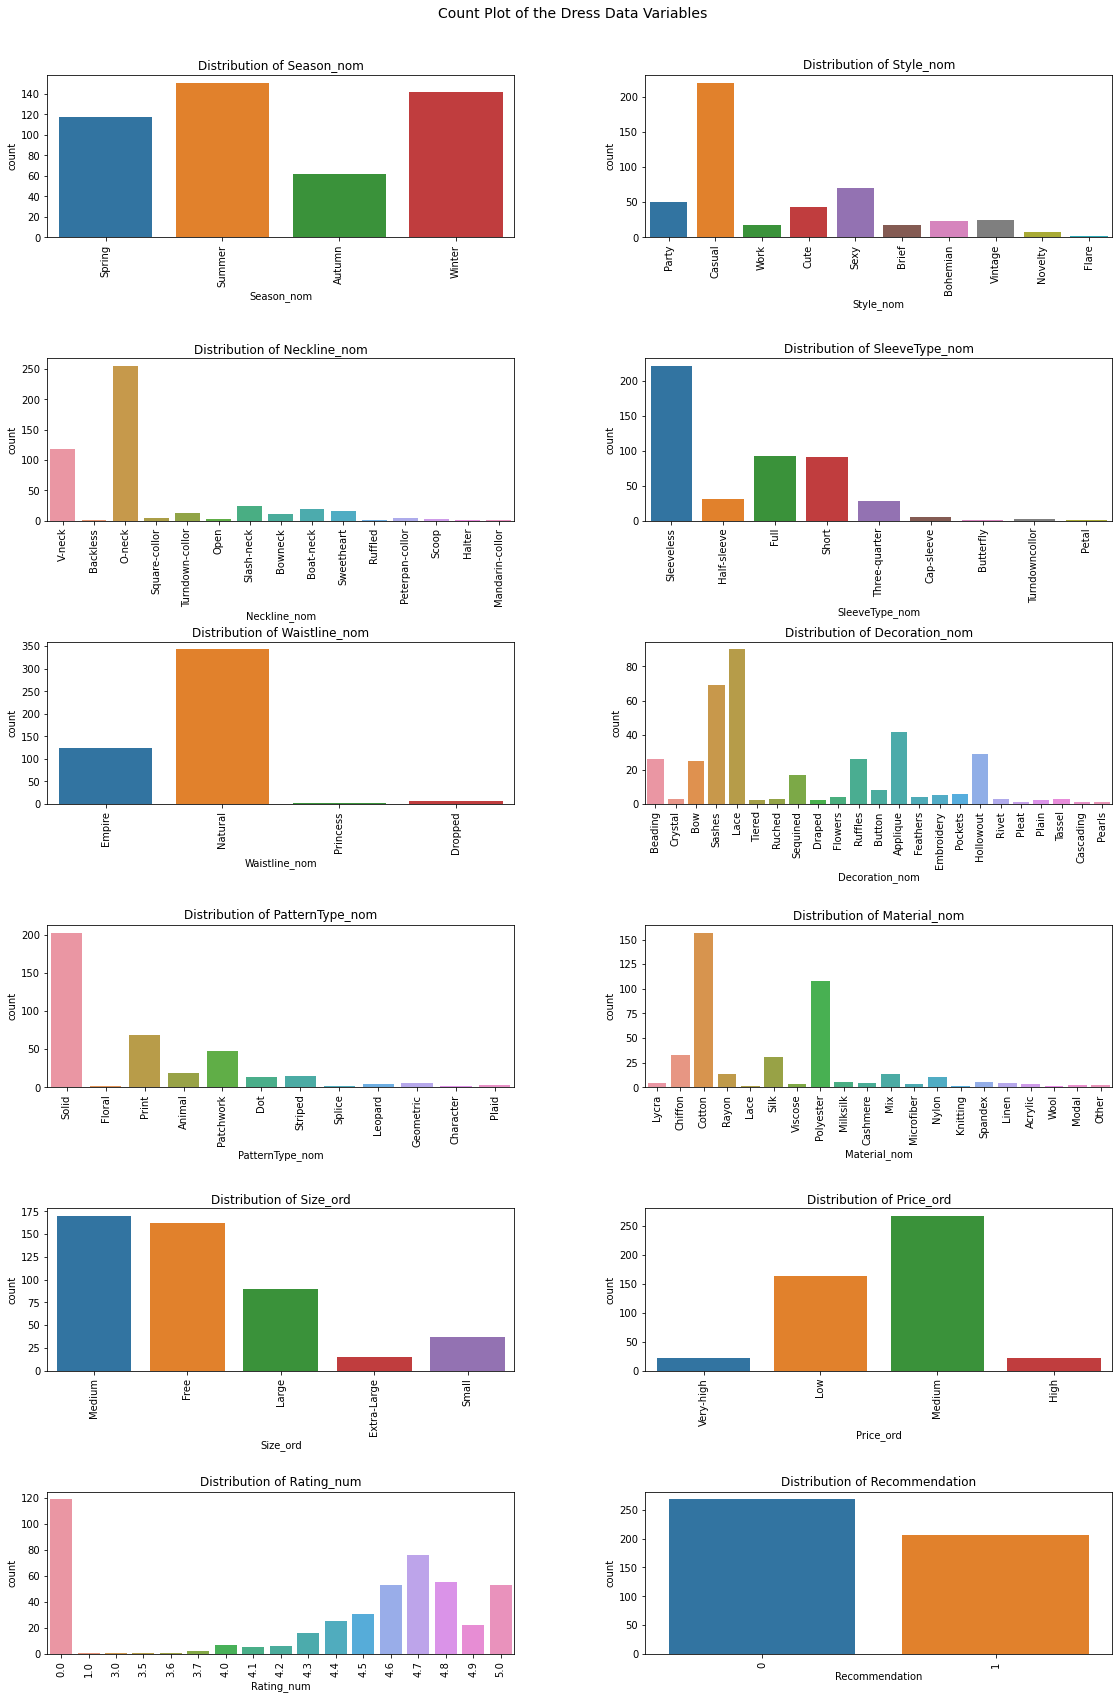

In [185]:
# Do a visual check of the data, value distributions and annomalities

# Determine the number of subplot rows/columns
n = len(df.columns)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 25))
fig.tight_layout(pad=10.0)
fig.suptitle("Count Plot of the Dress Data Variables", fontsize=14)

# Flatten the axs array to iterate through
axs = axs.flatten()

# Plot each categorical column in consective plots
for i, column in enumerate(df.columns):
    sns.countplot(x=column, data=df, ax=axs[i])
    axs[i].set_title(f'Distribution of {column}')
    axs[i].tick_params(axis='x',rotation=90)

# Hide any unused subplots
for ax in axs[i+1:]:
    ax.set_visible(False)

plt.show();

In [113]:
# There are more 0 Recommendation vs 1 Recommendations, which is our target variable. This imbalance can be addressed in the sampling stage.
# There is an overweight on Ratings = 0 vs the rest of the class. This imbalance can be addressed in the sampling stage.


### Sample Data and Split into Training and Test Sets

In [114]:
# need to be on scikit-learn 0.24.0 or above
# The scikit-learn version used is 1.2.2.
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.2.2.


In [114]:
df.columns

Index(['Season', 'Style', 'Neckline', 'SleeveType', 'Waistline', 'Decoration',
       'PatternType', 'Material', 'Size', 'Price', 'Rating', 'Recommendation'],
      dtype='object')

In [115]:
df.dtypes

Season             object
Style              object
Neckline           object
SleeveType         object
Waistline          object
Decoration         object
PatternType        object
Material           object
Size               object
Price              object
Rating            float64
Recommendation      int64
dtype: object

In [116]:
# Rename columns to append their ordinal/nominal/numberical classification for later identification
df.rename(columns={'Season':'Season_nom', 'Style':'Style_nom', 'Neckline':'Neckline_nom', 'SleeveType':'SleeveType_nom', 'Waistline':'Waistline_nom', 'Decoration':'Decoration_nom',
       'PatternType':'PatternType_nom', 'Material':'Material_nom', 'Size':'Size_ord', 'Price':'Price_ord', 'Rating':'Rating_num', 'Recommendation':'Recommendation'}, inplace=True)

In [117]:
# split the data into attributes and target

n_cols_dress = df.shape[1]
# Get feature categorical columns into dataframe x
x = df.iloc[:, 0:-1]
# Get Target Metric column into dataframe y
y = df.iloc[:, -1:]
type(x)
x.head(5)
y.head(5)

# split the data into test and training sets
# stratify addresses the imbalance in the y variable.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
len(x_train), len(x_test), len(y_train), len(y_test)

x_train['Rating_num'].value_counts()
x_test['Rating_num'].value_counts()
y_train['Recommendation'].value_counts()
y_test['Recommendation'].value_counts()

pandas.core.frame.DataFrame

,Season_nom,Style_nom,Neckline_nom,SleeveType_nom,Waistline_nom,Decoration_nom,PatternType_nom,Material_nom,Size_ord,Price_ord,Rating_num
293,Spring,Party,V-neck,Sleeveless,Empire,Beading,NaN,Lycra,Medium,Very-high,4.9
313,Summer,Casual,Backless,Sleeveless,Empire,Crystal,NaN,Chiffon,Free,Low,4.3
488,Summer,Casual,O-neck,Half-sleeve,Empire,Bow,Solid,Chiffon,Medium,Low,4.4
138,Autumn,Casual,O-neck,Full,Natural,Sashes,Solid,Cotton,Medium,Low,4.7
182,Spring,Casual,O-neck,Sleeveless,Empire,Lace,Floral,Cotton,Free,Low,4.7


,Recommendation
293,1
313,0
488,0
138,0
182,0


(355, 119, 355, 119)

0.0    91
4.7    58
4.8    45
4.6    41
5.0    39
4.5    20
4.4    18
4.9    16
4.3    14
4.0     5
4.2     3
4.1     3
3.0     1
3.5     1
Name: Rating_num, dtype: int64

0.0    28
4.7    18
5.0    14
4.6    12
4.5    11
4.8    10
4.4     7
4.9     6
4.2     3
4.3     2
3.7     2
4.0     2
4.1     2
3.6     1
1.0     1
Name: Rating_num, dtype: int64

0    201
1    154
Name: Recommendation, dtype: int64

0    67
1    52
Name: Recommendation, dtype: int64

### Prepare the Training Pipelines

In [118]:
# Extract column names according to their type
ordinal_columns = [col for col in df.columns if '_ord' in col]
nominal_columns = [col for col in df.columns if '_nom' in col]
numerical_columns = [col for col in df.columns if '_num' in col]

ordinal_columns
nominal_columns
numerical_columns

['Size_ord', 'Price_ord']

['Season_nom',
 'Style_nom',
 'Neckline_nom',
 'SleeveType_nom',
 'Waistline_nom',
 'Decoration_nom',
 'PatternType_nom',
 'Material_nom']

['Rating_num']

In [119]:
# Extract unique values for the ordinal columns
df[ordinal_columns[0]].unique()
df[ordinal_columns[1]].unique()

array(['Medium', 'Free', 'Large', 'Extra-Large', 'Small'], dtype=object)

array(['Very-high', 'Low', 'Medium', 'High', nan], dtype=object)

In [120]:
# Create ordered lists for those ordinal values
price_ordered_categories = ['Low', 'Medium', 'High','Very-high']
size_ordered_categories = ['Small', 'Medium', 'Large', 'Extra-Large', 'Free']

In [ ]:
# NaN is usually used as the placeholder for missing values. However, it enforces the data type to be float. 
# The parameter missing_values allows to specify other placeholder such as integer or text


In [194]:
# Define the ordinal categorical pipeline processing steps
# RandomForestClassifier()
# IterativeImputer(estimator=BayesianRidge(), initial_strategy='most_frequent', max_iter=10, random_state=0)
ordinal_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy='most_frequent')), #strategy='constant', fill_value='missing')
          ("encoder", OrdinalEncoder(categories=[price_ordered_categories, size_ordered_categories], handle_unknown="use_encoded_value", unknown_value=-999)),
          ("scaler", MinMaxScaler())]
)

# Define the nominal categorical pipeline processing steps
nominal_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy='most_frequent')), #strategy='constant', fill_value='missing')
          ("encoder", OneHotEncoder(handle_unknown="infrequent_if_exist", min_frequency=1, drop='first', sparse_output=False)),
          ("scaler", MinMaxScaler())]
)

# Define the numeric categorical pipeline processing steps
numeric_transformer = Pipeline(
    steps=[("imputer", KNNImputer(n_neighbors=1, weights='distance')), #another option is defining missing_values=0, or treat 0 a category of its own.
           ("scaler", MinMaxScaler())]
)

# Construct the processor with combined pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("ord_categoricals", ordinal_transformer, ordinal_columns),
        ("nom_categoricals", nominal_transformer, nominal_columns),
        ("numeric", numeric_transformer, numerical_columns)], 
        remainder='passthrough'
)

feature_selector = RFECV(estimator=GradientBoostingClassifier())

In [195]:
# examine pipeline encoding values properly
pipeline = Pipeline([("preprocessor", preprocessor)])
                    
fitted_pipeline = pipeline.fit_transform(x_train)                  
fitted_pipeline

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.96],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.92],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , ..., 0.  , 0.  , 0.9 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.94]])

In [196]:
fitted_pipeline.shape

(355, 88)

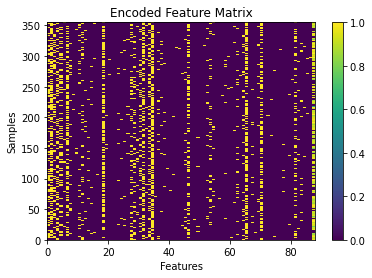

In [197]:
# Plot and visulise the encoded feature matrix

plt.pcolormesh(fitted_pipeline)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Encoded Feature Matrix')
plt.colorbar();

### Run the ML Training Pipeline for Different Models 

In [207]:
#3
# Logistic Regession

clf = LogisticRegression() #random_state=0
pipe = Pipeline([("preprocessor", preprocessor),
                 ("selector", feature_selector), 
                 ("classifier", clf)])
pipe.fit(x_train, np.ravel(y_train, order='C'))
predictions = pipe.predict(x_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_categoricals',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very-high'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large',
                                                                                               'Extra-Large',
                                                                                               'Free']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-9...
                                                  ['Season_nom', 'Style_nom',
                                                   'Neckline_nom',
                                                   'SleeveType_nom',
                                                   'Waistline_nom',
                                                   'Decoration_nom',
                                                   'PatternType_nom',
                                                   'Material_nom']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Rating_num'])])),
                ('selector', RFECV(estimator=GradientBoostingClassifier())),
                ('classifier', LogisticRegression())])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [205]:
# Model Evaluation
ml_metrics = {
    'Accuracy on Training Data':'{:.2f}'.format(pipe.score(x_train, y_train)), 
    'Accuracy on Test Data':'{:.2f}'.format(pipe.score(x_test, y_test)), 
    'Precision of Classifier on Test Data':'{:.2f}'.format(precision_score(y_test, predictions)), 
    'Recall of Classifier on Test Data':'{:.5f}'.format(recall_score(y_test, predictions)), 
    'F1 of Classifier on Test Data':'{:.5f}'.format(f1_score(y_test, predictions)), 
    'ROC AuC Score of Classifier on Test Data':'{:.2f}%'.format(roc_auc_score(y_test, predictions)*100)
}
pd.DataFrame.from_dict(ml_metrics, orient='index',
                       columns=['Metric Value'])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Metric Value
Accuracy on Training Data,0.65
Accuracy on Test Data,0.59
Precision of Classifier on Test Data,0.54
Recall of Classifier on Test Data,0.42308
F1 of Classifier on Test Data,0.47312
ROC AuC Score of Classifier on Test Data,56.97%


In [206]:

target_names = ['Not Recommended', 'Recommended']
print(classification_report(y_test, predictions, target_names=target_names))


                 precision    recall  f1-score   support

Not Recommended       0.62      0.72      0.66        67
    Recommended       0.54      0.42      0.47        52

       accuracy                           0.59       119
      macro avg       0.58      0.57      0.57       119
   weighted avg       0.58      0.59      0.58       119



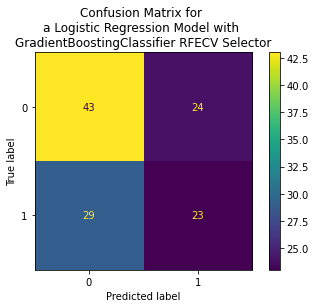

In [201]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for \na Logistic Regression Model with \nGradientBoostingClassifier RFECV Selector');


In [203]:
confusion_matrix(y_test, predictions)

array([[43, 24],
       [29, 23]])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


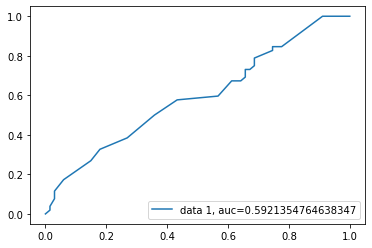

In [167]:
# Plot the ROC Curve
predictions_proba = pipe.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  predictions_proba)
auc = roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [168]:
#2
# Naive Bayes

clf = GaussianNB() #random_state=0
pipe = Pipeline([("preprocessor", preprocessor),
                 ("selector", feature_selector), 
                 ("classifier", clf)])
pipe.fit(x_train, np.ravel(y_train, order='C'))
predictions = pipe.predict(x_test)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_categoricals',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very-high'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large',
                                                                                               'Extra-Large',
                                                                                               'Free']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-9...
                                                                   MinMaxScaler())]),
                                                  ['Season_nom', 'Style_nom',
                                                   'Neckline_nom',
                                                   'SleeveType_nom',
                                                   'Waistline_nom',
                                                   'Decoration_nom',
                                                   'PatternType_nom',
                                                   'Material_nom']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Rating_num'])])),
                ('selector', RFECV(estimator=GradientBoostingClassifier())),
                ('classifier', GaussianNB())])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [169]:
# Model Evaluation
ml_metrics = {
    'Accuracy on Training Data':'{:.2f}'.format(pipe.score(x_train, y_train)), 
    'Accuracy on Test Data':'{:.2f}'.format(pipe.score(x_test, y_test)), 
    'Precision of Classifier on Test Data':'{:.2f}'.format(precision_score(y_test, predictions)), 
    'Recall of Classifier on Test Data':'{:.5f}'.format(recall_score(y_test, predictions)), 
    'F1 of Classifier on Test Data':'{:.5f}'.format(f1_score(y_test, predictions)), 
    'ROC AuC Score of Classifier on Test Data':'{:.2f}%'.format(roc_auc_score(y_test, predictions)*100)
}

pd.DataFrame.from_dict(ml_metrics, orient='index',
                       columns=['Metric Value'])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Metric Value
Accuracy on Training Data,0.65
Accuracy on Test Data,0.58
Precision of Classifier,0.52
Recall of Classifier on Test Data,0.59615
F1 of Classifier on Test Data,0.55357
ROC AuC Score of Classifier on Test Data,58.17%


In [170]:
target_names = ['Not Recommended', 'Recommended']
print(classification_report(y_test, predictions, target_names=target_names))


                 precision    recall  f1-score   support

Not Recommended       0.64      0.57      0.60        67
    Recommended       0.52      0.60      0.55        52

       accuracy                           0.58       119
      macro avg       0.58      0.58      0.58       119
   weighted avg       0.59      0.58      0.58       119



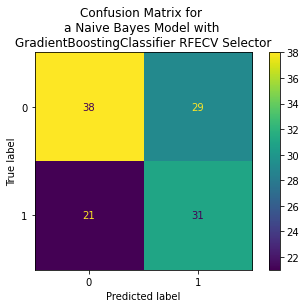

In [171]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for \na Naive Bayes Model with \nGradientBoostingClassifier RFECV Selector');


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


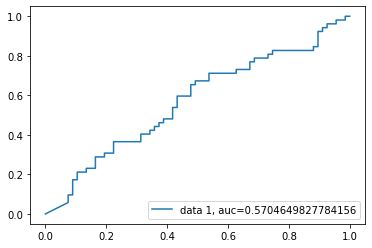

In [172]:
# Plot the ROC Curve
predictions_proba = pipe.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  predictions_proba)
auc = roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [175]:
#3a
# K-Nearest Neighbors (KNN)

clf = KNeighborsClassifier(n_neighbors=3) #random_state=0
pipe = Pipeline([("preprocessor", preprocessor),
                 ("selector", feature_selector), 
                 ("classifier", clf)])
pipe.fit(x_train, np.ravel(y_train, order='C'))
predictions = pipe.predict(x_test)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_categoricals',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very-high'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large',
                                                                                               'Extra-Large',
                                                                                               'Free']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-9...
                                                  ['Season_nom', 'Style_nom',
                                                   'Neckline_nom',
                                                   'SleeveType_nom',
                                                   'Waistline_nom',
                                                   'Decoration_nom',
                                                   'PatternType_nom',
                                                   'Material_nom']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Rating_num'])])),
                ('selector', RFECV(estimator=GradientBoostingClassifier())),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [176]:
# Model Evaluation
ml_metrics = {
    'Accuracy on Training Data':'{:.2f}'.format(pipe.score(x_train, y_train)), 
    'Accuracy on Test Data':'{:.2f}'.format(pipe.score(x_test, y_test)), 
    'Precision of Classifier on Test Data':'{:.2f}'.format(precision_score(y_test, predictions)), 
    'Recall of Classifier on Test Data':'{:.5f}'.format(recall_score(y_test, predictions)), 
    'F1 of Classifier on Test Data':'{:.5f}'.format(f1_score(y_test, predictions)), 
    'ROC AuC Score of Classifier on Test Data':'{:.2f}%'.format(roc_auc_score(y_test, predictions)*100)
}

pd.DataFrame.from_dict(ml_metrics, orient='index',
                       columns=['Metric Value'])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Metric Value
Accuracy on Training Data,0.75
Accuracy on Test Data,0.57
Precision of Classifier,0.51
Recall of Classifier on Test Data,0.59615
F1 of Classifier on Test Data,0.54867
ROC AuC Score of Classifier on Test Data,57.42%


In [177]:
from sklearn.metrics import classification_report
target_names = ['Not Recommended', 'Recommended']
print(classification_report(y_test, predictions, target_names=target_names))


                 precision    recall  f1-score   support

Not Recommended       0.64      0.55      0.59        67
    Recommended       0.51      0.60      0.55        52

       accuracy                           0.57       119
      macro avg       0.57      0.57      0.57       119
   weighted avg       0.58      0.57      0.57       119



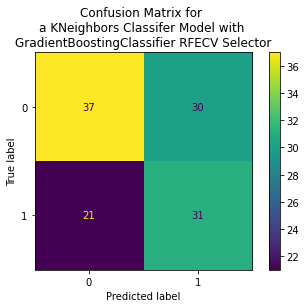

In [178]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for \na KNeighbors Classifer Model with \nGradientBoostingClassifier RFECV Selector');


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


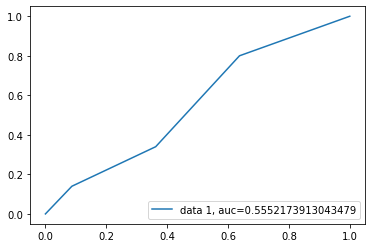

In [133]:
# Plot the ROC Curve

predictions_proba = pipe.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  predictions_proba)
auc = roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();

In [134]:
from sklearn.model_selection import cross_val_score, KFold

k_values = [i for i in range (1,31)]
scores = []

# scaler = MinMaxScaler()
# X = scaler.fit_transform(x)
cv = KFold(n_splits=4)

for k in k_values:
    print(k)
    clf = KNeighborsClassifier(n_neighbors=k) 
    pipe = Pipeline([("preprocessor", preprocessor),
                     ("selector", feature_selector), 
                     ("classifier", clf)])
    #pipe.fit(x_train, np.ravel(y_train, order='C'))
    score = cross_val_score(pipe, x, np.ravel(y), cv=5)
    scores.append(np.mean(score))
#     predictions = pipe.predict(x_test)

#     knn = KNeighborsClassifier(n_neighbors=k)
#     score = cross_val_score(knn, X, y, cv=5)
#     scores.append(np.mean(score))

1


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

2


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

3


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

4


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

5


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

6


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

7


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

8


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

9


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

10


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

11


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

12


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

13


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

14


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

15


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

16


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

17


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

18


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

19


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 3, 5] during transform. These unknown categories will be encoded as a

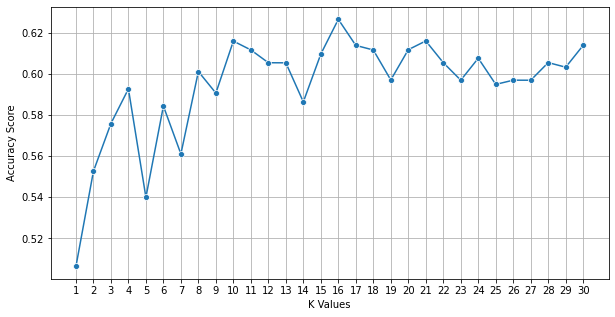

In [151]:
# 16 is the optimum neightnour k-means 
k_list = k_values + k_values2
s_list = scores + scores2
plt.figure(figsize=(10,5))
ax=sns.lineplot(x = k_list, y = s_list, marker = 'o')
ax.set(xticks=(k_list))
plt.grid()
plt.xlabel("K Values")
plt.ylabel("Accuracy Score");

### Optimising KNN Model

In [179]:
#3b
# Optimised K-Nearest Neighbors (KNN)

clf = KNeighborsClassifier(n_neighbors=16) #random_state=0
pipe = Pipeline([("preprocessor", preprocessor),
                 ("selector", feature_selector), 
                 ("classifier", clf)])
pipe.fit(x_train, np.ravel(y_train, order='C'))
predictions = pipe.predict(x_test)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_categoricals',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(categories=[['Low',
                                                                                               'Medium',
                                                                                               'High',
                                                                                               'Very-high'],
                                                                                              ['Small',
                                                                                               'Medium',
                                                                                               'Large',
                                                                                               'Extra-Large',
                                                                                               'Free']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-9...
                                                  ['Season_nom', 'Style_nom',
                                                   'Neckline_nom',
                                                   'SleeveType_nom',
                                                   'Waistline_nom',
                                                   'Decoration_nom',
                                                   'PatternType_nom',
                                                   'Material_nom']),
                                                 ('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Rating_num'])])),
                ('selector', RFECV(estimator=GradientBoostingClassifier())),
                ('classifier', KNeighborsClassifier(n_neighbors=16))])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [180]:
# Model Evaluation
ml_metrics = {
    'Accuracy on Training Data':'{:.2f}'.format(pipe.score(x_train, y_train)), 
    'Accuracy on Test Data':'{:.2f}'.format(pipe.score(x_test, y_test)), 
    'Precision of Classifier on Test Data':'{:.2f}'.format(precision_score(y_test, predictions)), 
    'Recall of Classifier on Test Data':'{:.5f}'.format(recall_score(y_test, predictions)), 
    'F1 of Classifier on Test Data':'{:.5f}'.format(f1_score(y_test, predictions)), 
    'ROC AuC Score of Classifier on Test Data':'{:.2f}%'.format(roc_auc_score(y_test, predictions)*100)
}

pd.DataFrame.from_dict(ml_metrics, orient='index',
                       columns=['Metric Value'])

/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Metric Value
Accuracy on Training Data,0.69
Accuracy on Test Data,0.65
Precision of Classifier,0.66
Recall of Classifier on Test Data,0.40385
F1 of Classifier on Test Data,0.50000
ROC AuC Score of Classifier on Test Data,61.98%


In [181]:
from sklearn.metrics import classification_report
target_names = ['Not Recommended', 'Recommended']
print(classification_report(y_test, predictions, target_names=target_names))


                 precision    recall  f1-score   support

Not Recommended       0.64      0.84      0.73        67
    Recommended       0.66      0.40      0.50        52

       accuracy                           0.65       119
      macro avg       0.65      0.62      0.61       119
   weighted avg       0.65      0.65      0.63       119



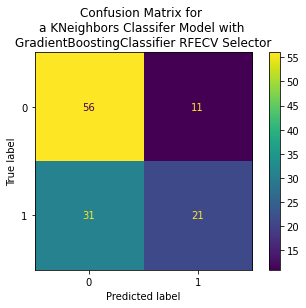

In [182]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
disp.ax_.set_title('Confusion Matrix for \na KNeighbors Classifer Model with \nGradientBoostingClassifier RFECV Selector');


/Users/salih/opt/anaconda3/envs/myenv2/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


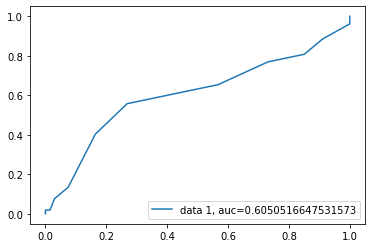

In [183]:
# Plot the ROC Curve

predictions_proba = pipe.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  predictions_proba)
auc = roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show();